In [1]:
# Load libraries

# # Plotting utils 
import datetime
import glob
import os
import pickle
# Analysis
import time
import warnings
from datetime import date, timedelta

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util
import matplotlib as matplotlib
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import metpy.calc as mpc
import numpy as np
import pandas as pd
import scipy.stats as stats
import xarray as xr
from matplotlib.dates import DateFormatter
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import seaborn as sns

warnings.filterwarnings('ignore')

## Import Ngl with pyn_env active 
import Ngl

## Read in data

### Forcing data

In [2]:
forcingFile  = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
forcDS       = xr.open_dataset(forcingFile, decode_times=True)

## Convert to local time
localTimes  = forcDS['time'].values - np.timedelta64(5,'h')
forcDS      = forcDS.assign_coords({"time": localTimes})

## Pick out the days of interest 
iDay_20170802   = np.where( (forcDS['time.year']==2017) & (forcDS['time.month']==8) & (forcDS['time.day']==2) )[0]
forcDS_20170802 = forcDS.isel(time=iDay_20170802)

iDay_20160819   = np.where( (forcDS['time.year']==2016) & (forcDS['time.month']==8) & (forcDS['time.day']==19) )[0]
forcDS_20160819 = forcDS.isel(time=iDay_20160819)

iDay_20160719   = np.where( (forcDS['time.year']==2016) & (forcDS['time.month']==7) & (forcDS['time.day']==19) )[0]
forcDS_20160719 = forcDS.isel(time=iDay_20160719)

iDay_20160720   = np.where( (forcDS['time.year']==2016) & (forcDS['time.month']==7) & (forcDS['time.day']==20) )[0]
forcDS_20160720 = forcDS.isel(time=iDay_20160720)

iDay_20170712   = np.where( (forcDS['time.year']==2017) & (forcDS['time.month']==7) & (forcDS['time.day']==12) )[0]
forcDS_20170712 = forcDS.isel(time=iDay_20170712)


In [3]:
def plotObs_timeHeight(pltVar, pltDS, 
                       cmapSel='viridis', ymax=750, ymin=1000,
                       cbarFormat=None, cbarMax=None, cbarMin=None):
    
    ## Control intervals used in contouring
    if cbarMax==None:
        levSelMax  = np.nanpercentile([pltDS[pltVar].values], 99) 
    else: 
        levSelMax  = cbarMax 
        
    if cbarMin==None:
        levSelMin  = np.nanpercentile([pltDS[pltVar].values], 10) 
    else: 
        levSelMin = cbarMin 
    levC       = np.arange(levSelMin, levSelMax+(levSelMax-levSelMin)/100, (levSelMax-levSelMin)/100)
    
    ## Set up the plot
    fig,axs = plt.subplots(1,1, figsize=(8,6))

    cplt = axs.contourf(pltDS['time'].values, 
                        pltDS['lev'].values,
                        np.squeeze(pltDS[pltVar].values).transpose(),
                        levC, cmap=cmapSel, extend='both')


    axs.set_title('Obs : '+pltDS[pltVar].long_name)


    # # Use meaningful x-labels
    axs.xaxis.set_major_formatter(DateFormatter("%m/%d %H"))

    # Add colorbar
    ax_position = axs.get_position()
    cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.03])
    cbar = plt.colorbar(cplt, orientation='horizontal',cax=cbar_ax, label=pltDS[pltVar].units, format=cbarFormat)
    cbar.ax.tick_params(labelsize=12) 

    # axs.invert_yaxis()
    
    axs.set_ylim([ymin,ymax])
 
    axs.set_xlim([pltDS.time.values[8], pltDS.time.values[-2]])
    
    return

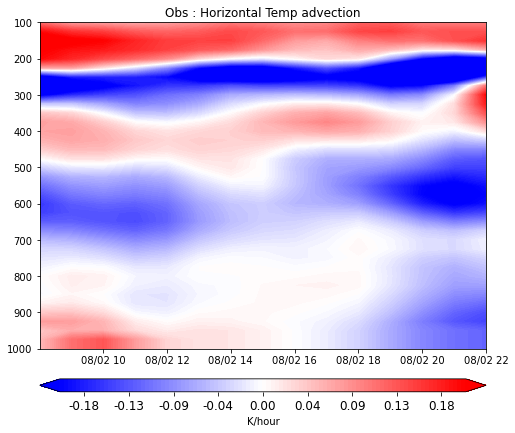

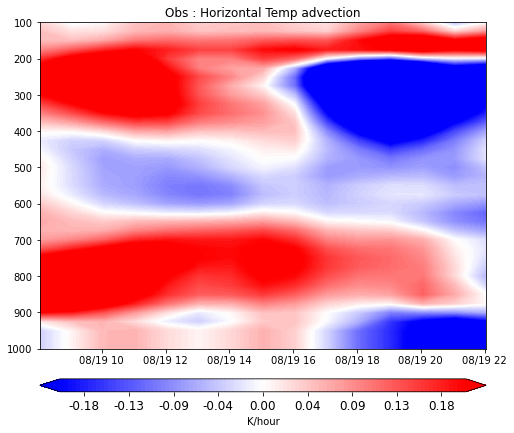

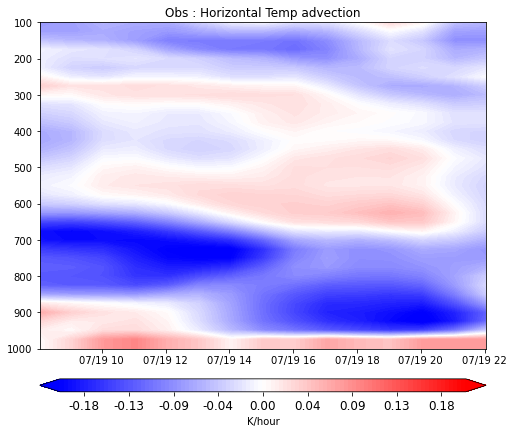

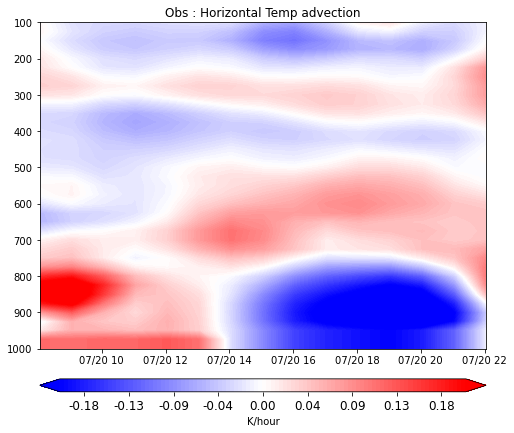

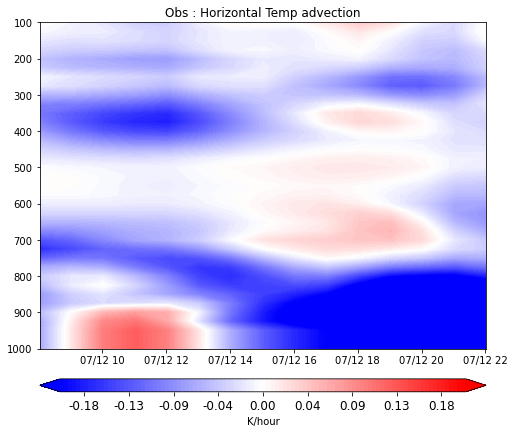

In [27]:
plotObs_timeHeight('T_adv_h', forcDS_20170802, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('T_adv_h', forcDS_20160819, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('T_adv_h', forcDS_20160719, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('T_adv_h', forcDS_20160720, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('T_adv_h', forcDS_20170712, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)


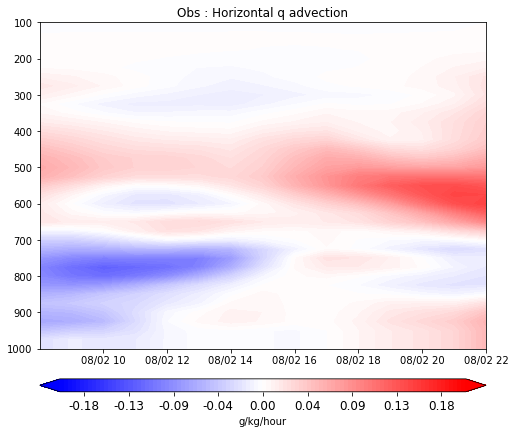

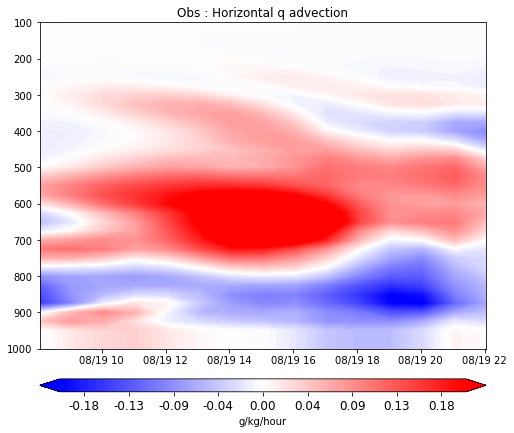

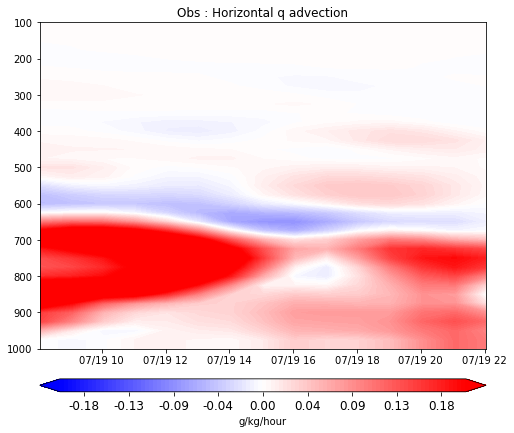

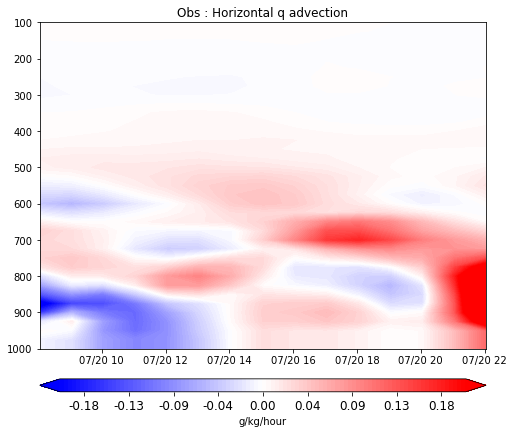

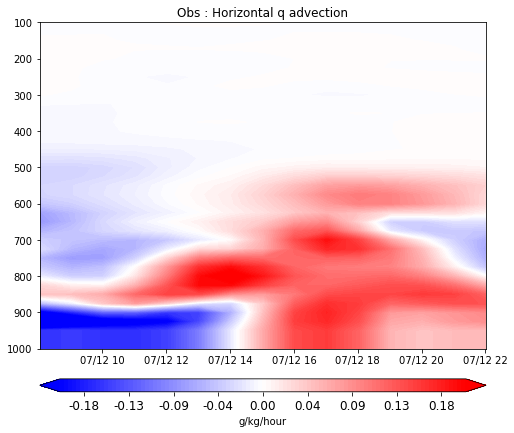

In [28]:
plotObs_timeHeight('q_adv_h', forcDS_20170802, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160819, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160719, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160720, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20170712, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)



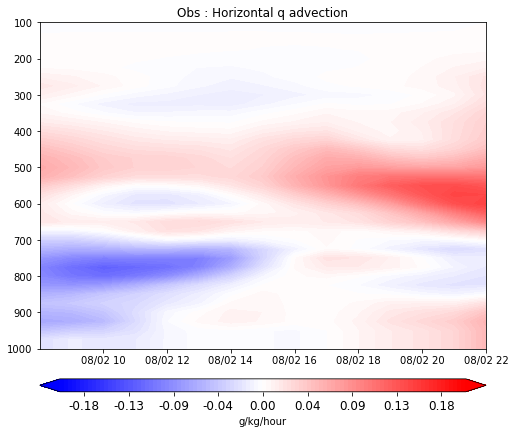

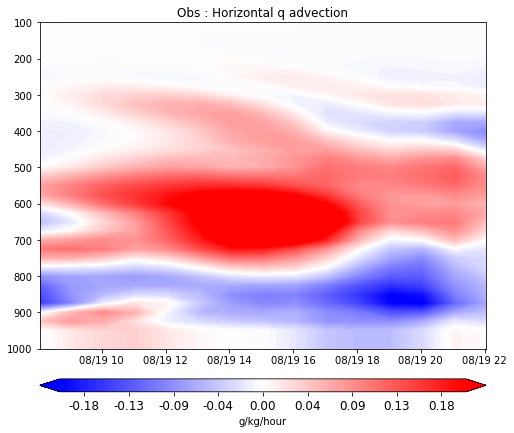

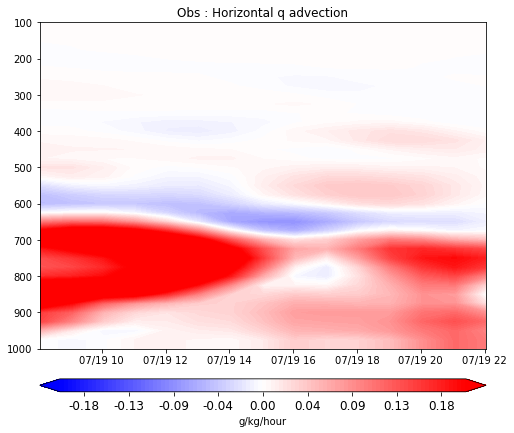

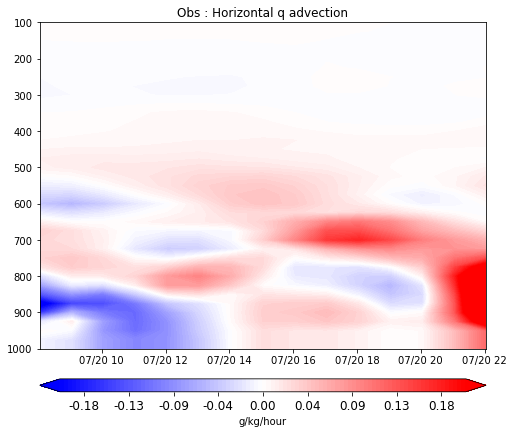

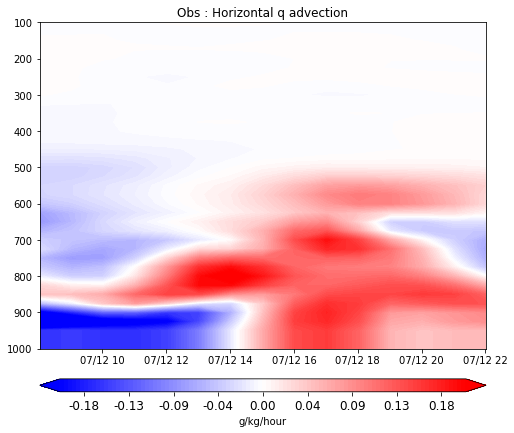

In [4]:
plotObs_timeHeight('q_adv_h', forcDS_20170802, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160819, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160719, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20160720, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)

plotObs_timeHeight('q_adv_h', forcDS_20170712, 
                    cmapSel='bwr', ymax=100, ymin=1000,
                    cbarFormat='%.2f', cbarMax=0.2, cbarMin=-0.2)



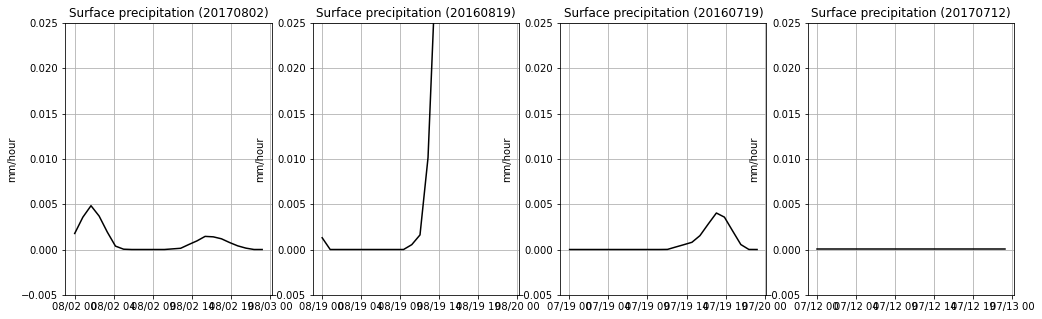

In [5]:
fig,axs = plt.subplots(1,4, figsize=(17,5))
axs = axs.ravel()

varPlot = 'prec_srf'
ymin = -0.005
ymax = 0.025

# varPlot = 'q_srf'
# ymin = 0.013
# ymax = 0.019

axs[0].plot(forcDS_20170802.time.values, 
            np.squeeze(forcDS_20170802[varPlot].values), 'k', label='obs')
axs[0].set_title(forcDS_20170802[varPlot].long_name+ ' (20170802)')
axs[0].set_ylabel(forcDS_20170802[varPlot].units)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[0].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))

axs[1].plot(forcDS_20160819.time.values, 
            np.squeeze(forcDS_20160819[varPlot].values), 'k', label='obs')
axs[1].set_title(forcDS_20160819[varPlot].long_name+ ' (20160819)')
axs[1].set_ylabel(forcDS_20160819[varPlot].units)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[1].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))

axs[2].plot(forcDS_20160719.time.values, 
            np.squeeze(forcDS_20160719[varPlot].values), 'k', label='obs')
axs[2].set_title(forcDS_20160719[varPlot].long_name+ ' (20160719)')
axs[2].set_ylabel(forcDS_20160719[varPlot].units)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[2].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))

axs[3].plot(forcDS_20170712.time.values, 
            np.squeeze(forcDS_20170712[varPlot].values), 'k', label='obs')
axs[3].set_title(forcDS_20170712[varPlot].long_name+ ' (20170712)')
axs[3].set_ylabel(forcDS_20170712[varPlot].units)
axs[3].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[3].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))


axs[0].set_ylim([ymin, ymax])
axs[1].set_ylim([ymin, ymax])
axs[2].set_ylim([ymin, ymax])
axs[3].set_ylim([ymin, ymax])

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()


### LES default output

In [2]:
lesDir = '/glade/scratch/mdfowler/CLASP_LESoutput/'

lesDateStrings = ['20170712', '20160819', '20160720']
#lesDateStrings = ['20170802', '20160819', '20160719', '20170712']

In [3]:
lesDir = lesDir+'defaultOutput/chaney-web-00.egr.duke.edu/CLASP/LES/diags/'

for iDay in range(len(lesDateStrings)):

    HMGdir = lesDir+'doz_'+lesDateStrings[iDay]+'_01/'
    HTGdir = lesDir+'doz_'+lesDateStrings[iDay]+'_00/'

    listFilesHMG = np.sort(glob.glob(HMGdir+'diag_d01*'))
    listFilesHTG = np.sort(glob.glob(HTGdir+'diag_d01*'))

    for iFileHMG in range(len(listFilesHMG)): 
        dsHMG = xr.open_dataset(listFilesHMG[iFileHMG], decode_times=False)
        dsHMG = dsHMG.set_index(Time='XTIME').assign_coords({"case": 'HMG'})

        if iFileHMG==0:
            HMGds_lesDay = dsHMG 
        else: 
            HMGds_lesDay = xr.concat([HMGds_lesDay, dsHMG], dim='Time')

    for iFileHTG in range(len(listFilesHTG)): 
        dsHTG = xr.open_dataset(listFilesHTG[iFileHTG], decode_times=False)
        dsHTG = dsHTG.set_index(Time='XTIME').assign_coords({"case": 'HTG'})

        if iFileHTG==0:
            HTGds_lesDay = dsHTG 
        else: 
            HTGds_lesDay = xr.concat([HTGds_lesDay, dsHTG], dim='Time')


    LES_allCasesDefault = xr.concat([HMGds_lesDay, HTGds_lesDay], "case") 
    
    if lesDateStrings[iDay]=='20170802':
        LES_allCasesDefault_20170802 = LES_allCasesDefault
    elif lesDateStrings[iDay]=='20160819':
        LES_allCasesDefault_20160819 = LES_allCasesDefault
    elif lesDateStrings[iDay]=='20160719':
        LES_allCasesDefault_20160719 = LES_allCasesDefault
    elif lesDateStrings[iDay]=='20170712':
        LES_allCasesDefault_20170712 = LES_allCasesDefault
    else:
        print('Hey you need to name these dates!')

KeyboardInterrupt: 

In [8]:
del LES_allCasesDefault
del HTGds_lesDay
del dsHTG 
del HMGds_lesDay
del dsHMG  

**Fix time arrays**

In [9]:
startTime_20170802   = datetime.datetime(2017,8,2, (12-5), 0, 0)  ## Starts at 12 UTC, so -5hr to get to LST

times_20170802 = [] 
for iT in range(len(LES_allCasesDefault_20170802.Time.values)): 
    timeStep       = startTime_20170802+timedelta(minutes = int(LES_allCasesDefault_20170802.Time.values[iT]))
    times_20170802 = np.append(times_20170802, timeStep)
    
LES_allCasesDefault_20170802['datetime'] = (('Time'), times_20170802)
LES_allCasesDefault_20170802             = LES_allCasesDefault_20170802.set_index(Time='datetime')


In [10]:
startTime_20160819   = datetime.datetime(2016,8,19, (12-5), 0, 0)  ## Starts at 12 UTC, so -5hr to get to LST

times_20160819 = [] 
for iT in range(len(LES_allCasesDefault_20160819.Time.values)): 
    timeStep       = startTime_20160819+timedelta(minutes = int(LES_allCasesDefault_20160819.Time.values[iT]))
    times_20160819 = np.append(times_20160819, timeStep)
    
LES_allCasesDefault_20160819['datetime'] = (('Time'), times_20160819)
LES_allCasesDefault_20160819             = LES_allCasesDefault_20160819.set_index(Time='datetime')


In [11]:
startTime_20160719   = datetime.datetime(2016,7,19, (12-5), 0, 0)  ## Starts at 12 UTC, so -5hr to get to LST

times_20160719 = [] 
for iT in range(len(LES_allCasesDefault_20160719.Time.values)): 
    timeStep       = startTime_20160719+timedelta(minutes = int(LES_allCasesDefault_20160719.Time.values[iT]))
    times_20160719 = np.append(times_20160719, timeStep)
    
LES_allCasesDefault_20160719['datetime'] = (('Time'), times_20160719)
LES_allCasesDefault_20160719             = LES_allCasesDefault_20160719.set_index(Time='datetime')


In [12]:
startTime_20170712   = datetime.datetime(2017,7,12, (12-5), 0, 0)  ## Starts at 12 UTC, so -5hr to get to LST

times_20170712 = [] 
for iT in range(len(LES_allCasesDefault_20170712.Time.values)): 
    timeStep       = startTime_20170712+timedelta(minutes = int(LES_allCasesDefault_20170712.Time.values[iT]))
    times_20170712 = np.append(times_20170712, timeStep)
    
LES_allCasesDefault_20170712['datetime'] = (('Time'), times_20170712)
LES_allCasesDefault_20170712             = LES_allCasesDefault_20170712.set_index(Time='datetime')


## Plots!

In [13]:
def plotLES_timeHeight(pltVar, pltDS, zVals, cmapSel='viridis', ymax=10000,
                       cbarFormat=None, cbarMax=None, cbarMin=None):
    
    ## Control intervals used in contouring
    if cbarMax==None:
        levSelMax  = np.nanpercentile(pltDS[pltVar], 99) 
    else: 
        levSelMax  = cbarMax 
        
    if cbarMin==None:
        levSelMin  = np.nanpercentile(pltDS[pltVar], 10) 
    else: 
        levSelMin = cbarMin 
    levC       = np.arange(levSelMin, levSelMax, (levSelMax-levSelMin)/100)


    fig,axs = plt.subplots(1,3, figsize=(20,7))
    axs     = axs.ravel()

    ## Plot raw values (HMG, HTG) 
    axs[0].contourf(pltDS.sel(case='HMG')['Time'].values, 
                    zVals.sel(case='HMG').mean(dim='Time'), 
                    pltDS.sel(case='HMG')[pltVar].values.transpose(),
                    levC, cmap=cmapSel, extend='both')

    cplt = axs[1].contourf(pltDS.sel(case='HTG')['Time'].values, 
                        zVals.sel(case='HTG').mean(dim='Time'),
                        pltDS.sel(case='HTG')[pltVar].values.transpose(),
                        levC, cmap=cmapSel, extend='both')
    
    # Add colorbar
    ax_position = axs[1].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.1, ax_position.width+0.1, 0.03])
    cbar = plt.colorbar(cplt, orientation='horizontal',cax=cbar_ax, label=pltDS[pltVar].units, format=cbarFormat)
    cbar.ax.tick_params(labelsize=12) 

    axs[0].set_title('HMG: '+pltDS[pltVar].description)
    axs[1].set_title('HTG')
    
    ## Plot difference too
    testDS = pltDS.sel(case='HTG')[pltVar].values
    ctrlDS = pltDS.sel(case='HMG')[pltVar].values
    diffDS = testDS - ctrlDS
    levsMaxDiff = np.nanpercentile(diffDS, 95) 
    levsMinDiff = np.nanpercentile(diffDS, 5) 
    levsEvenDiff = np.nanmax([np.abs(levsMaxDiff), np.abs(levsMinDiff)])
    cstep        = (2*levsEvenDiff)/100
    levsCdiff    = np.arange(-levsEvenDiff, levsEvenDiff+cstep, cstep)
    
    cplt2 = axs[2].contourf(pltDS.sel(case='HTG')['Time'].values, 
                        zVals.sel(case='HTG').mean(dim='Time'),
                        diffDS.transpose(),
                        levsCdiff, cmap='bwr', extend='both')
    
    # Add colorbar
    ax_position = axs[2].get_position()
    cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.03])
    cbar = plt.colorbar(cplt2, orientation='horizontal',cax=cbar_ax, label=pltDS[pltVar].units, format=cbarFormat)
    cbar.ax.tick_params(labelsize=12) 

    axs[2].set_title('HTG-HMG') 

    # # Use meaningful x-labels
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(7))
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(7))
    axs[2].xaxis.set_major_locator(plt.MaxNLocator(7))
    axs[0].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
    axs[1].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
    axs[2].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))


    axs[0].set_ylim([0,ymax])
    axs[1].set_ylim([0,ymax])
    axs[2].set_ylim([0,ymax])

    
#     axs[0].set_xlim([pltDS.Time.values[0]+np.timedelta64(2,'h'), 
#                      pltDS.Time.values[0]+np.timedelta64(6,'h')] )

#     axs[1].set_xlim([pltDS.Time.values[0]+np.timedelta64(2,'h'), 
#                      pltDS.Time.values[0]+np.timedelta64(6,'h')] )
    
#     axs[2].set_xlim([pltDS.Time.values[0]+np.timedelta64(2,'h'), 
#                      pltDS.Time.values[0]+np.timedelta64(6,'h')] )
    

    return

(17359.291666666668, 17359.916666666668)

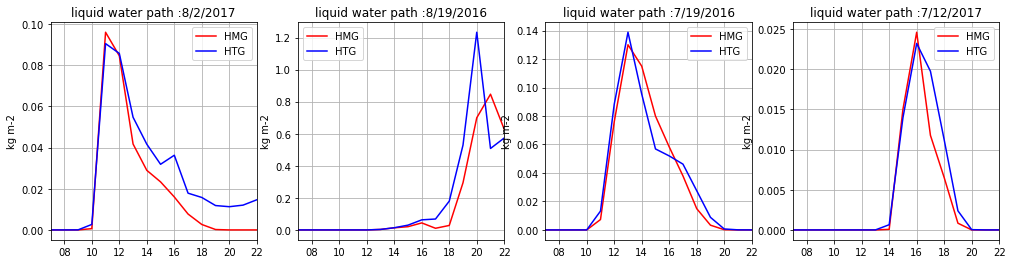

In [14]:
fig,axs = plt.subplots(1,4, figsize=(17,4))
axs = axs.ravel()

pltVar = 'AVT_LWP'

axs[0].plot(LES_allCasesDefault_20170802.Time.values, 
            LES_allCasesDefault_20170802.sel(case='HMG')[pltVar].values, 'r', label='HMG')
axs[0].plot(LES_allCasesDefault_20170802.Time.values, 
            LES_allCasesDefault_20170802.sel(case='HTG')[pltVar].values, 'b', label='HTG')
axs[0].set_title(LES_allCasesDefault_20170802[pltVar].description+' :'+
              str(LES_allCasesDefault_20170802['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20170802['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20170802['Time.year'].values[0])  )
axs[0].legend()
axs[0].set_ylabel(LES_allCasesDefault_20170802[pltVar].units)
# axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
# axs[0].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
axs[0].xaxis.set_major_formatter(DateFormatter("%H"))



axs[1].plot(LES_allCasesDefault_20160819.Time.values, 
            LES_allCasesDefault_20160819.sel(case='HMG')[pltVar].values, 'r', label='HMG')
axs[1].plot(LES_allCasesDefault_20160819.Time.values, 
            LES_allCasesDefault_20160819.sel(case='HTG')[pltVar].values, 'b', label='HTG')
axs[1].set_title(LES_allCasesDefault_20160819[pltVar].description+' :'+
              str(LES_allCasesDefault_20160819['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20160819['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20160819['Time.year'].values[0])  )
axs[1].legend()
axs[1].set_ylabel(LES_allCasesDefault_20160819[pltVar].units)
# axs[1].xaxis.set_major_locator(plt.MaxNLocator(6))
# axs[1].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
axs[1].xaxis.set_major_formatter(DateFormatter("%H"))



axs[2].plot(LES_allCasesDefault_20160719.Time.values, 
            LES_allCasesDefault_20160719.sel(case='HMG')[pltVar].values, 'r', label='HMG')
axs[2].plot(LES_allCasesDefault_20160719.Time.values, 
            LES_allCasesDefault_20160719.sel(case='HTG')[pltVar].values, 'b', label='HTG')
axs[2].set_title(LES_allCasesDefault_20160719[pltVar].description+' :'+
              str(LES_allCasesDefault_20160719['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20160719['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20160719['Time.year'].values[0])  )
axs[2].legend()
axs[2].set_ylabel(LES_allCasesDefault_20160719[pltVar].units)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[2].xaxis.set_major_formatter(DateFormatter("%H"))

axs[3].plot(LES_allCasesDefault_20170712.Time.values, 
            LES_allCasesDefault_20170712.sel(case='HMG')[pltVar].values, 'r', label='HMG')
axs[3].plot(LES_allCasesDefault_20170712.Time.values, 
            LES_allCasesDefault_20170712.sel(case='HTG')[pltVar].values, 'b', label='HTG')
axs[3].set_title(LES_allCasesDefault_20170712[pltVar].description+' :'+
              str(LES_allCasesDefault_20170712['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20170712['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20170712['Time.year'].values[0])  )
axs[3].legend()
axs[3].set_ylabel(LES_allCasesDefault_20170712[pltVar].units)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[3].xaxis.set_major_formatter(DateFormatter("%H"))


axs[0].set_ylim([-0.005, 0.18])
axs[1].set_ylim([-0.005, 0.18])
axs[2].set_ylim([-0.005, 0.18])
axs[3].set_ylim([-0.005, 0.18])

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()

axs[0].set_xlim([LES_allCasesDefault_20170802.Time.values[0], LES_allCasesDefault_20170802.Time.values[0]+np.timedelta64(15,'h') ])
axs[1].set_xlim([LES_allCasesDefault_20160819.Time.values[0], LES_allCasesDefault_20160819.Time.values[0]+np.timedelta64(15,'h') ])
axs[2].set_xlim([LES_allCasesDefault_20160719.Time.values[0], LES_allCasesDefault_20160719.Time.values[0]+np.timedelta64(15,'h') ])
axs[3].set_xlim([LES_allCasesDefault_20170712.Time.values[0], LES_allCasesDefault_20170712.Time.values[0]+np.timedelta64(15,'h') ])

# axs[0].axvline(LES_allCasesDefault_20160610.Time.values[0]+np.timedelta64(2,'h'), color='green')
# axs[0].axvline(LES_allCasesDefault_20160610.Time.values[0]+np.timedelta64(6,'h'), color='green')
# axs[2].axvline(LES_allCasesDefault_20170924.Time.values[0]+np.timedelta64(2,'h'), color='green')
# axs[2].axvline(LES_allCasesDefault_20160719.Time.values[0]+np.timedelta64(6,'h'), color='green')

(17359.291666666668, 17359.916666666668)

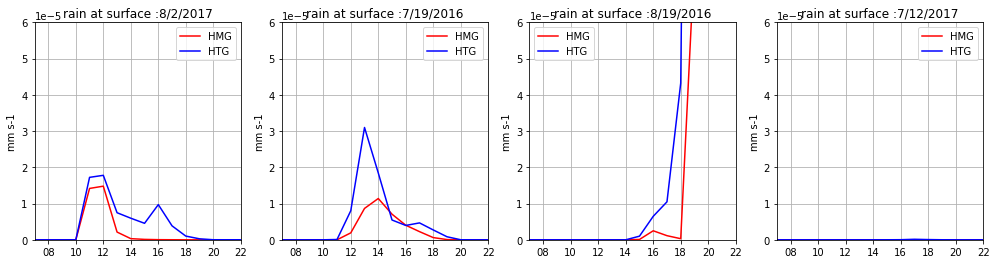

In [59]:
fig,axs = plt.subplots(1,4, figsize=(17,4))
axs = axs.ravel()

pltVar = 'AVS_RAIN'

axs[0].plot(LES_allCasesDefault_20170802.Time.values, 
            LES_allCasesDefault_20170802.sel(case='HMG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'r', label='HMG')
axs[0].plot(LES_allCasesDefault_20170802.Time.values, 
            LES_allCasesDefault_20170802.sel(case='HTG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'b', label='HTG')
axs[0].set_title(LES_allCasesDefault_20170802[pltVar].description+' :'+
              str(LES_allCasesDefault_20170802['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20170802['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20170802['Time.year'].values[0])  )
axs[0].legend()
axs[0].set_ylabel(LES_allCasesDefault_20170802[pltVar].units)
# axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
# axs[0].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
axs[0].xaxis.set_major_formatter(DateFormatter("%H"))



axs[1].plot(LES_allCasesDefault_20160719.Time.values, 
            LES_allCasesDefault_20160719.sel(case='HMG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'r', label='HMG')
axs[1].plot(LES_allCasesDefault_20160719.Time.values, 
            LES_allCasesDefault_20160719.sel(case='HTG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'b', label='HTG')
axs[1].set_title(LES_allCasesDefault_20160719[pltVar].description+' :'+
              str(LES_allCasesDefault_20160719['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20160719['Time.day'].values[0]) +'/'+
              str(LES_allCasesDefault_20160719['Time.year'].values[0]) )
axs[1].legend()
axs[1].set_ylabel(LES_allCasesDefault_20160719[pltVar].units)
# axs[1].xaxis.set_major_locator(plt.MaxNLocator(6))
# axs[1].xaxis.set_major_formatter(DateFormatter("%m/%d %H"))
axs[1].xaxis.set_major_formatter(DateFormatter("%H"))



axs[2].plot(LES_allCasesDefault_20160819.Time.values, 
            LES_allCasesDefault_20160819.sel(case='HMG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'r', label='HMG')
axs[2].plot(LES_allCasesDefault_20160819.Time.values, 
            LES_allCasesDefault_20160819.sel(case='HTG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'b', label='HTG')
axs[2].set_title(LES_allCasesDefault_20160819[pltVar].description+' :'+
              str(LES_allCasesDefault_20160819['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20160819['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20160819['Time.year'].values[0]) )
axs[2].legend()
axs[2].set_ylabel(LES_allCasesDefault_20160819[pltVar].units)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[2].xaxis.set_major_formatter(DateFormatter("%H"))


axs[3].plot(LES_allCasesDefault_20170712.Time.values, 
            LES_allCasesDefault_20170712.sel(case='HMG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'r', label='HMG')
axs[3].plot(LES_allCasesDefault_20170712.Time.values, 
            LES_allCasesDefault_20170712.sel(case='HTG')[pltVar].mean(dim='south_north').mean(dim='west_east').values, 'b', label='HTG')
axs[3].set_title(LES_allCasesDefault_20170712[pltVar].description+' :'+
              str(LES_allCasesDefault_20170712['Time.month'].values[0])+'/'+
              str(LES_allCasesDefault_20170712['Time.day'].values[0])+'/'+
              str(LES_allCasesDefault_20170712['Time.year'].values[0]) )

axs[3].legend()
axs[3].set_ylabel(LES_allCasesDefault_20170712[pltVar].units)
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[3].xaxis.set_major_formatter(DateFormatter("%H"))


axs[0].set_ylim([0, 6e-5])
axs[1].set_ylim([0, 6e-5])
axs[2].set_ylim([0, 6e-5])
axs[3].set_ylim([0, 6e-5])

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()

axs[0].set_xlim([LES_allCasesDefault_20170802.Time.values[0], LES_allCasesDefault_20170802.Time.values[0]+np.timedelta64(15,'h') ])
axs[1].set_xlim([LES_allCasesDefault_20160719.Time.values[0], LES_allCasesDefault_20160719.Time.values[0]+np.timedelta64(15,'h') ])
axs[2].set_xlim([LES_allCasesDefault_20160819.Time.values[0], LES_allCasesDefault_20160819.Time.values[0]+np.timedelta64(15,'h') ])
axs[3].set_xlim([LES_allCasesDefault_20170712.Time.values[0], LES_allCasesDefault_20170712.Time.values[0]+np.timedelta64(15,'h') ])

# axs[0].axvline(LES_allCasesDefault_20160610.Time.values[0]+np.timedelta64(2,'h'), color='green')
# axs[0].axvline(LES_allCasesDefault_20160610.Time.values[0]+np.timedelta64(6,'h'), color='green')
# axs[2].axvline(LES_allCasesDefault_20170924.Time.values[0]+np.timedelta64(2,'h'), color='green')
# axs[2].axvline(LES_allCasesDefault_20170924.Time.values[0]+np.timedelta64(6,'h'), color='green')

In [47]:
## Grid spacing, dx and dy, is 250 m (or 0.25 km)
xvals = (LES_allCasesDefault_20160719.west_east.values)*0.250
yvals = (LES_allCasesDefault_20160719.south_north.values)*0.250

Text(0.5, 1.0, '\n7/12: Local Hour 13')

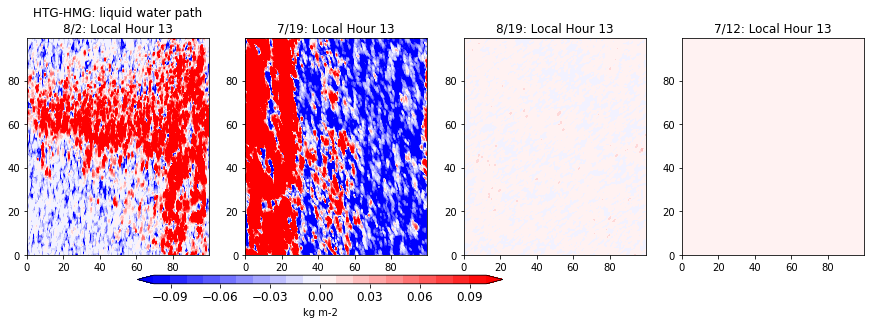

In [ ]:
## Plot HTG-HMG difference per day at a selected hour 

pltVar = 'AVS_LWP'
hrSel  = 13

htg_20170802 = LES_allCasesDefault_20170802.sel(case='HTG').isel(Time=np.where(LES_allCasesDefault_20170802['Time.hour'].values==hrSel)[0])
hmg_20170802 = LES_allCasesDefault_20170802.sel(case='HMG').isel(Time=np.where(LES_allCasesDefault_20170802['Time.hour'].values==hrSel)[0])
diff_20170802 = htg_20170802 - hmg_20170802

htg_20160719 = LES_allCasesDefault_20160719.sel(case='HTG').isel(Time=np.where(LES_allCasesDefault_20160719['Time.hour'].values==hrSel)[0])
hmg_20160719 = LES_allCasesDefault_20160719.sel(case='HMG').isel(Time=np.where(LES_allCasesDefault_20160719['Time.hour'].values==hrSel)[0])
diff_20160719 = htg_20160719 - hmg_20160719

htg_20160819 = LES_allCasesDefault_20160819.sel(case='HTG').isel(Time=np.where(LES_allCasesDefault_20160819['Time.hour'].values==hrSel)[0])
hmg_20160819 = LES_allCasesDefault_20160819.sel(case='HMG').isel(Time=np.where(LES_allCasesDefault_20160819['Time.hour'].values==hrSel)[0])
diff_20160819 = htg_20160819 - hmg_20160819

htg_20170712 = LES_allCasesDefault_20170712.sel(case='HTG').isel(Time=np.where(LES_allCasesDefault_20170712['Time.hour'].values==hrSel)[0])
hmg_20170712 = LES_allCasesDefault_20170712.sel(case='HMG').isel(Time=np.where(LES_allCasesDefault_20170712['Time.hour'].values==hrSel)[0])
diff_20170712 = htg_20170712 - hmg_20170712

## Plot options 
fig,axs = plt.subplots(1,4, figsize=(15,4))
axs     = axs.ravel()

levsDiff = np.arange(-0.1,0.11,0.01)   ## AVS_LWP
# levsDiff = np.arange(-100,101,1)   ## AVS_SH
# levsDiff = np.arange(-2e-5, 2.05e-5, 0.05e-5)   ## AVS_RAIN


## Plot the difference 
axs[0].contourf(xvals, yvals, np.squeeze(diff_20170802[pltVar].values), 
               levsDiff, cmap='bwr', extend='both')

cplt = axs[1].contourf(xvals, yvals, np.squeeze(diff_20160719[pltVar].values), 
               levsDiff, cmap='bwr', extend='both')

# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.1, ax_position.width+0.17, 0.03])
cbar = plt.colorbar(cplt, orientation='horizontal',cax=cbar_ax, label=LES_allCasesDefault_20170802[pltVar].units)
cbar.ax.tick_params(labelsize=12) 

axs[2].contourf(xvals, yvals, np.squeeze(diff_20160819[pltVar].values), 
               levsDiff, cmap='bwr', extend='both')

axs[3].contourf(xvals, yvals, np.squeeze(diff_20170712[pltVar].values), 
               levsDiff, cmap='bwr', extend='both')

## Set titles 
axs[0].set_title('HTG-HMG: '+LES_allCasesDefault_20170802[pltVar].description+'\n'+
              str(diff_20170802['Time.month'].values[0])+'/'+
              str(diff_20170802['Time.day'].values[0])+': Local Hour '+
              str(diff_20170802['Time.hour'].values[0]) )

axs[1].set_title('\n'+
              str(diff_20160719['Time.month'].values[0])+'/'+
              str(diff_20160719['Time.day'].values[0])+': Local Hour '+
              str(diff_20160719['Time.hour'].values[0]) )

axs[2].set_title('\n'+
              str(diff_20160819['Time.month'].values[0])+'/'+
              str(diff_20160819['Time.day'].values[0])+': Local Hour '+
              str(diff_20160819['Time.hour'].values[0]) )

axs[3].set_title('\n'+
              str(diff_20170712['Time.month'].values[0])+'/'+
              str(diff_20170712['Time.day'].values[0])+': Local Hour '+
              str(diff_20170712['Time.hour'].values[0]) )


In [17]:
def drawMap(pltVar, pltDS, testDS, ctrlDS, diffDS, levsC, levsCdiff, cmapRaw, timeSel):
    
    ## Plot raw values 
    axs[0].contourf(xvals, yvals, ctrlDS.isel(Time=timeSel).values, 
                   levsC, cmap=cmapRaw, extend='both')

    cplt = axs[1].contourf(xvals, yvals, testDS.isel(Time=timeSel).values, 
                   levsC, cmap=cmapRaw, extend='both')

    # Add colorbar
    ax_position = axs[1].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.05, ax_position.width+0.1, 0.03])
    cbar = plt.colorbar(cplt, orientation='horizontal',cax=cbar_ax, label=pltDS[pltVar].units)
    cbar.ax.tick_params(labelsize=12) 

    axs[0].set_title(pltCaseCtrl+': '+pltDS[pltVar].description+'\n'+
                  str(pltDS['Time.month'].values[timeSel])+'/'+
                  str(pltDS['Time.day'].values[timeSel])+': Local Hour '+
                  str(pltDS['Time.hour'].values[timeSel]) )

    axs[1].set_title(pltCaseTest+': '+pltDS[pltVar].description+'\n'+
                  str(pltDS['Time.month'].values[timeSel])+'/'+
                  str(pltDS['Time.day'].values[timeSel])+': Local Hour '+
                  str(pltDS['Time.hour'].values[timeSel]) )


    ## Plot the difference 
    cplt = axs[2].contourf(xvals, yvals, diffDS.isel(Time=timeSel).values, 
                   levsCdiff, cmap='bwr', extend='both')
    # Add colorbar
    ax_position = axs[2].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.05, ax_position.width+0.1, 0.03])
    cbar = plt.colorbar(cplt, orientation='horizontal',cax=cbar_ax, label=pltDS[pltVar].units)
    cbar.ax.tick_params(labelsize=12) 

    axs[2].set_title(pltCaseTest+'-'+pltCaseCtrl+': '+pltDS[pltVar].description+'\n'+
                  str(pltDS['Time.month'].values[timeSel])+'/'+
                  str(pltDS['Time.day'].values[timeSel])+': Local Hour '+
                  str(pltDS['Time.hour'].values[timeSel]) )

    return

def animate(frame):
    return drawMap(pltVar, pltDS, testDS, ctrlDS, diffDS, levsC, levsCdiff, cmapRaw, frame)


In [ ]:
# pltDS       = LES_allCasesDefault_20170802
# dateString  = '20170802'

# pltDS       = LES_allCasesDefault_20160719
# dateString  = '20160719'

# pltDS       = LES_allCasesDefault_20160819
# dateString  = '20160819'

In [20]:
fig,axs = plt.subplots(1,3, figsize=(20,7))
axs     = axs.ravel()

pltVar      = 'AVS_SH'
pltDS       = LES_allCasesDefault_20160819
dateString  = '20160819'
pltCaseTest = 'HTG'
pltCaseCtrl = 'HMG' 
cmapRaw     = 'viridis'

testDS = pltDS.sel(case=pltCaseTest)[pltVar]
ctrlDS = pltDS.sel(case=pltCaseCtrl)[pltVar]

## Get levels to plot 
levsMinRaw = np.nanpercentile(pltDS[pltVar], 10)
levsMaxRaw = np.nanpercentile(pltDS[pltVar], 99)
levsC      = np.arange(levsMinRaw, levsMaxRaw, (levsMaxRaw-levsMinRaw)/100)

diffDS = testDS - ctrlDS
levsMaxDiff = np.nanpercentile(diffDS.values, 95) 
levsMinDiff = np.nanpercentile(diffDS.values, 5) 
levsEvenDiff = np.nanmax([np.abs(levsMaxDiff), np.abs(levsMinDiff)])
cstep        = (2*levsEvenDiff)/100
levsCdiff    = np.arange(-levsEvenDiff, levsEvenDiff+cstep, cstep)

frames = len(pltDS.Time.values)
ani = animation.FuncAnimation(fig, animate, frames, interval=1, blit=False,
                              repeat=False)

# ani.save('TestAnimation_HTGminusHMG_'+pltVar+'.mp4', writer=animation.FFMpegWriter(fps=8))
writergif = animation.PillowWriter(fps=1) 
ani.save('../CLASP_animations/'+pltVar+'_'+dateString+'.gif', writer=writergif)

plt.close(fig)

In [23]:
fig,axs = plt.subplots(1,3, figsize=(20,7))
axs     = axs.ravel()

pltVar      = 'AVS_LWP'
pltDS       = LES_allCasesDefault_20160819
dateString  = '20160819'
pltCaseTest = 'HTG'
pltCaseCtrl = 'HMG' 
cmapRaw     = 'viridis'

testDS = pltDS.sel(case=pltCaseTest)[pltVar]
ctrlDS = pltDS.sel(case=pltCaseCtrl)[pltVar]

## Get levels to plot 
levsMinRaw = np.nanpercentile(pltDS[pltVar], 10)
levsMaxRaw = np.nanpercentile(pltDS[pltVar], 99)
levsC      = np.arange(levsMinRaw, levsMaxRaw, (levsMaxRaw-levsMinRaw)/100)

diffDS = testDS - ctrlDS
levsMaxDiff = np.nanpercentile(diffDS.values, 95) 
levsMinDiff = np.nanpercentile(diffDS.values, 5) 
levsEvenDiff = np.nanmax([np.abs(levsMaxDiff), np.abs(levsMinDiff)])
cstep        = (2*levsEvenDiff)/100
levsCdiff    = np.arange(-levsEvenDiff, levsEvenDiff+cstep, cstep)

frames = len(pltDS.Time.values)
ani = animation.FuncAnimation(fig, animate, frames, interval=1, blit=False,
                              repeat=False)

# ani.save('TestAnimation_HTGminusHMG_'+pltVar+'.mp4', writer=animation.FFMpegWriter(fps=8))
writergif = animation.PillowWriter(fps=1) 
ani.save('../CLASP_animations/'+pltVar+'_'+dateString+'.gif', writer=writergif)

plt.close(fig)

In [24]:
pwd

'/glade/u/home/mdfowler/Analysis/CLASP_ensOptions'